# Average files with pyFAI
---

### Jupyter setup
! *Do not edit it if you are not sure in what yoou are doing* !

In [66]:
%matplotlib nbagg
# The notebook interface (nbagg) is needed in jupyter-notebook while the widget is recommended for jupyer lab
# %matplotlib widget

import fabio
import pyFAI
from pyFAI.gui import jupyter
import silx.io as silx

from IPython.display import HTML
from IPython.display import display

show_hide = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="show / hide code"></form>''')
display(show_hide)

In [64]:
!cd /data/id13/inhouse3/DATAPOLICY_I3_1/eh3/inhouse/ihsc1687/id13/mro_std_01/mro_std_01_Al2O3_m220p0/scan00002/eiger
!ls

Al2O3_m220p0.poni
mask.edf
mro_std_01_Al2O3_m220p0_00002_data_000000.h5
mro_std_01_Al2O3_m220p0_00002_data_000001.h5
mro_std_01_Al2O3_m220p0_00002_data_000002.h5
mro_std_01_Al2O3_m220p0_00002_data_000003.h5
mro_std_01_Al2O3_m220p0_00002_data_000004.h5
mro_std_01_Al2O3_m220p0_00002_data_000005.h5
mro_std_01_Al2O3_m220p0_00002_data_000006.h5
mro_std_01_Al2O3_m220p0_00002_data_000007.h5
mro_std_01_Al2O3_m220p0_00002_data_000008.h5
mro_std_01_Al2O3_m220p0_00002_data_000009.h5
mro_std_01_Al2O3_m220p0_00002_data_000010.h5
mro_std_01_Al2O3_m220p0_00002_data_000011.h5
mro_std_01_Al2O3_m220p0_00002_data_000012.h5
test.edf


In [65]:
!pyFAI-average **mro_std_01_Al2O3_m220p0_00002_data_** -o ~/test2.edf

INFO:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
Mean reduction finished                                                                                       


In [52]:
!pyFAI-average **$files** -o ~/test2.edf

INFO:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Display the result

<IPython.core.display.Javascript object>


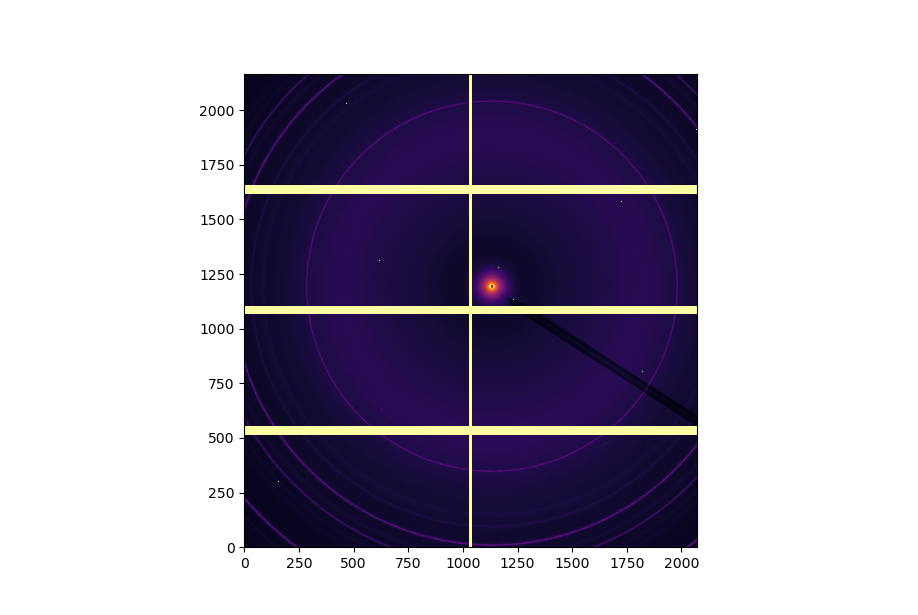

In [11]:
img = fabio.open('./test.edf').data
jupyter.display(img);

<IPython.core.display.Javascript object>


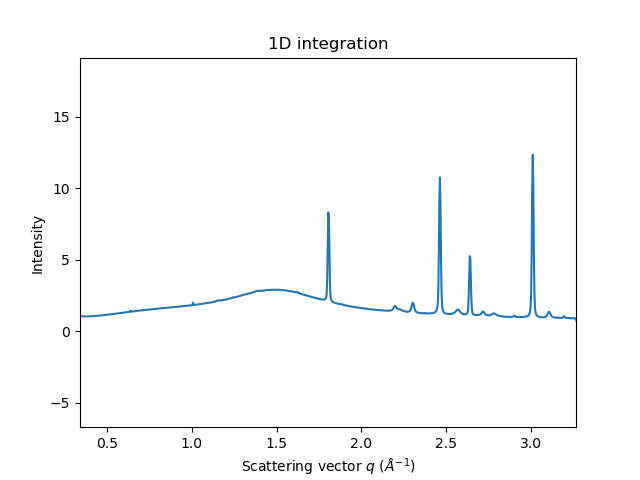

In [29]:
ai = pyFAI.load("./Al2O3_m220p0.poni")
mask = fabio.open('./mask.edf').data
res_dat = ai.integrate1d_ng(img, 
                        1000,
                        mask=mask,
                        unit="q_A^-1")
ax = jupyter.plot1d(res_dat)

<IPython.core.display.Javascript object>


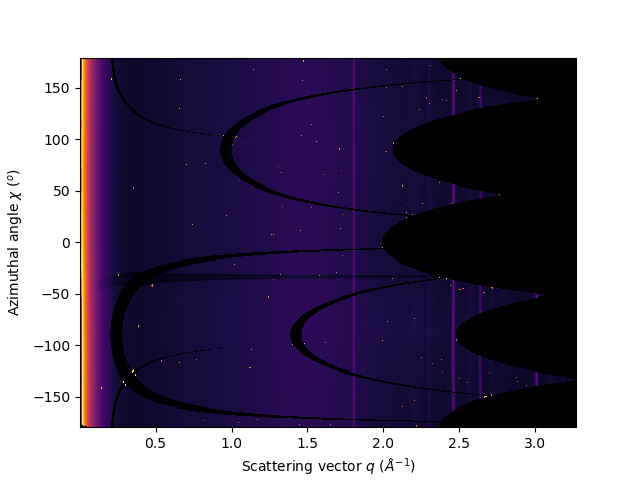

In [32]:
res_azim = ai.integrate2d_ng(img,
                            1000, 360,
                             unit="q_A^-1")
ax = jupyter.plot2d(res_azim)